In [658]:
#importing liabrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [659]:
# Loading data
#Loading the data
test = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")

In [660]:
#Cheking Shape of trin and test columns
train.shape

(31647, 18)

In [661]:
#test data do not have subscrive(prediction value)so 17 columns
test.shape

(13564, 17)

In [662]:
#cheking columns
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [663]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [664]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [665]:
# difference is on higher between 3rd qutile and max so may be outliers present 
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [666]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [667]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [668]:
#EDA
train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [669]:
test.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [670]:
#to see last 5
test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [671]:
train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [672]:
# our targer varibale is categorical form and most are the columns are in categogory/word so we use ordinal encoder later

In [673]:
#Checking Null Values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [674]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

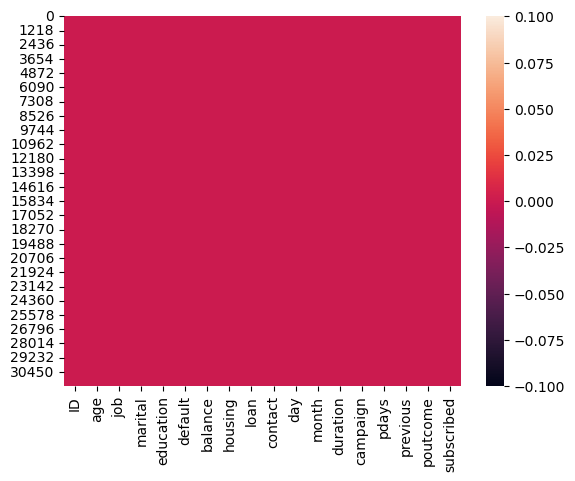

In [675]:
sns.heatmap(train.isnull())

In [676]:
#Checking unique values i.e how many columns have categorical data
train.nunique().to_frame('unique values')

,unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


no     27932
yes     3715
Name: subscribed, dtype: int64


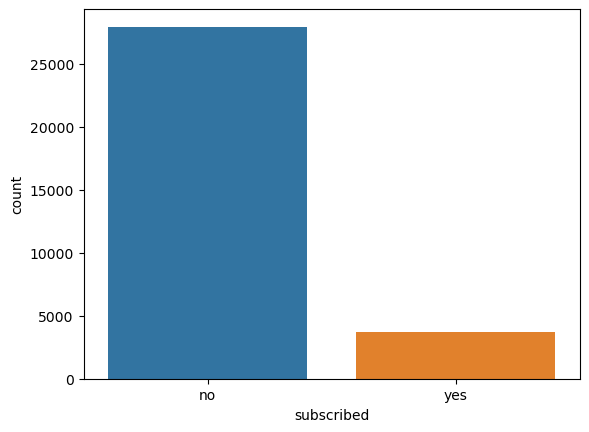

In [677]:
#Graphical representation of target variable
x=sns.countplot(data=train,x='subscribed')
print(train['subscribed'].value_counts())

In [678]:
train.shape

(31647, 18)

no     27932
yes     3715
Name: subscribed, dtype: int64


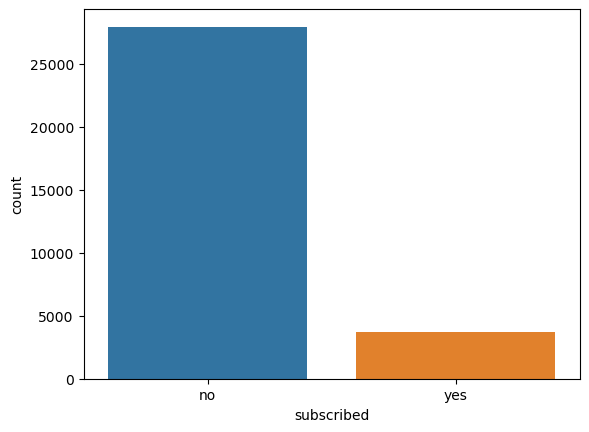

In [679]:
#Graphical representation of target variable
x=sns.countplot(data=train,x='subscribed')
print(train['subscribed'].value_counts())

In [680]:
# its clerely visible that targer variabkle have squeness so using cubetoot 
# train['subscribed']=np.cbrt(train['subscribed'])--not working so using normalisation method
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

no     27932
yes     3715
Name: subscribed, dtype: int64


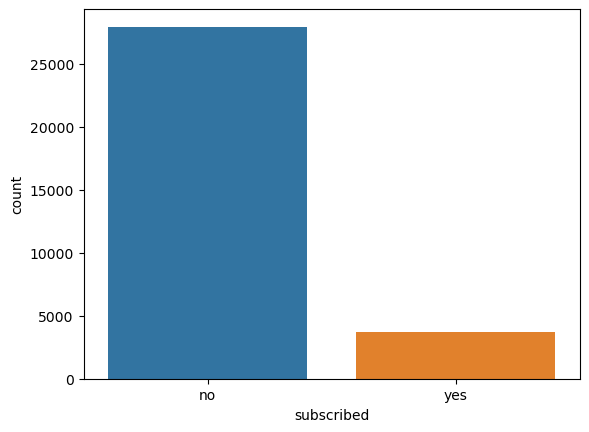

In [681]:
ax=sns.countplot(data=train,x='subscribed')
print(train['subscribed'].value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


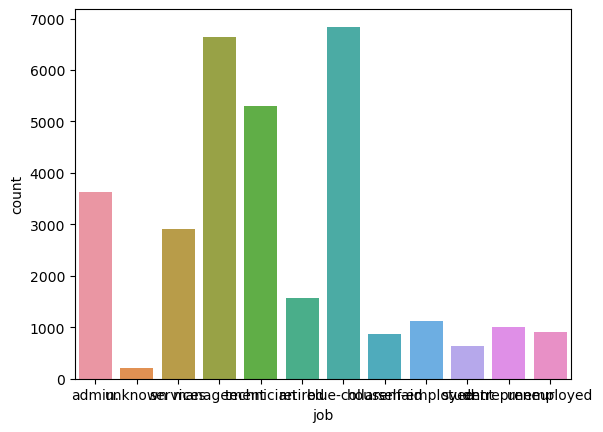

In [682]:
ax=sns.countplot(data=train,x='job')
print(train['job'].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


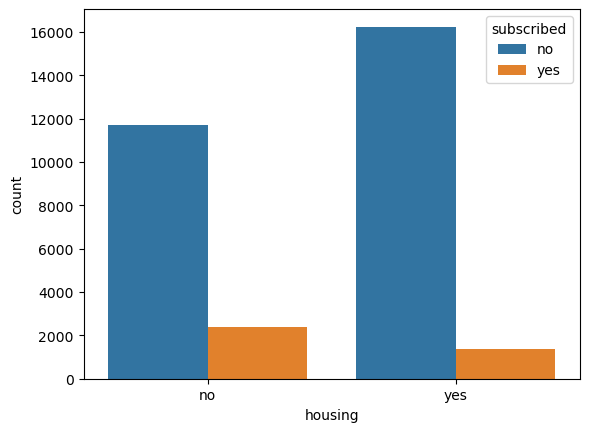

In [683]:
ax=sns.countplot(data=train,x='housing',hue='subscribed')
print(train['housing'].value_counts())

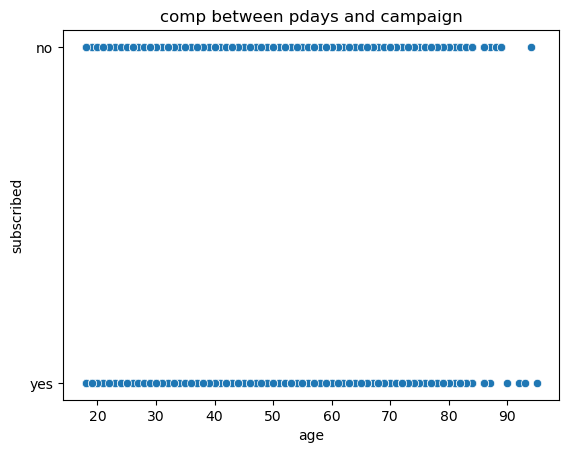

In [684]:
plt.title('comp between pdays and campaign')
sns.scatterplot(x='age',y='subscribed',data=train,palette='bright')
plt.show()

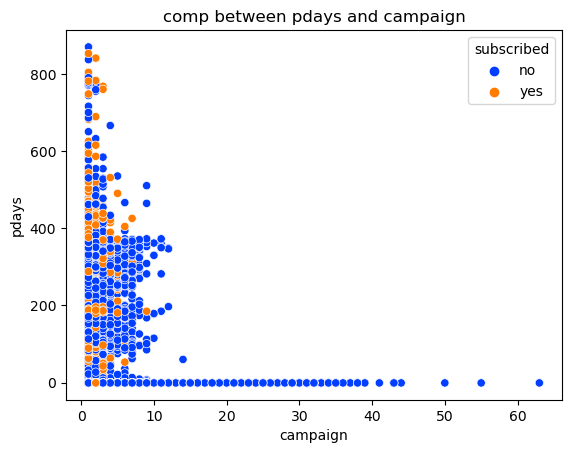

In [685]:
#comparision between 
plt.title('comp between pdays and campaign')
sns.scatterplot(x='campaign',y='pdays',data=train,hue='subscribed',palette='bright')
plt.show()

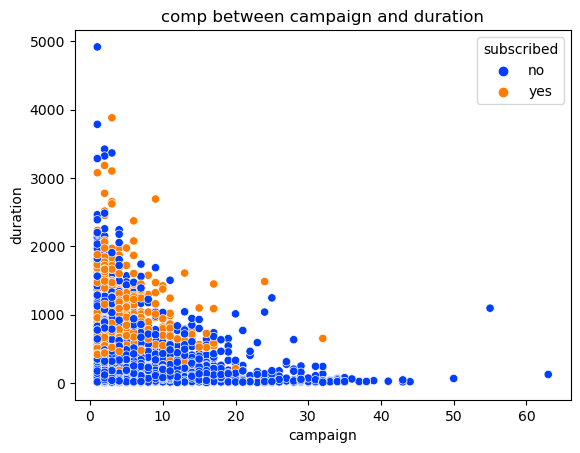

In [686]:
#comparision between 
plt.title('comp between campaign and duration')
sns.scatterplot(x='campaign',y='duration',data=train,hue='subscribed',palette='bright')
plt.show()

<Axes: >

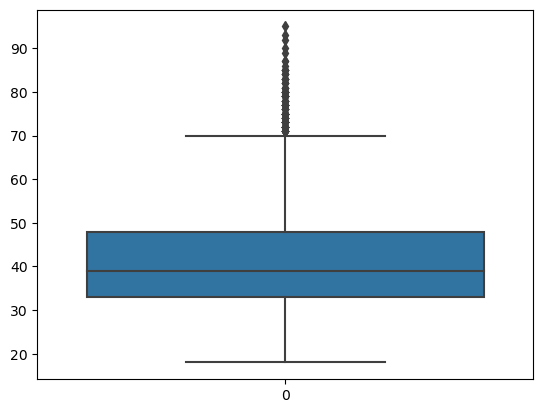

In [687]:
sns.boxplot(test['age'])#

<Axes: >

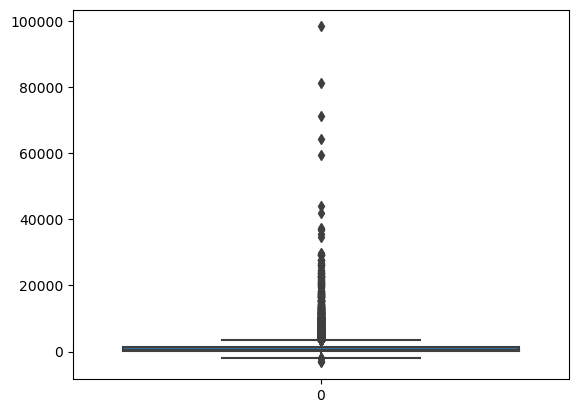

In [688]:
sns.boxplot(test['balance'])

<Axes: >

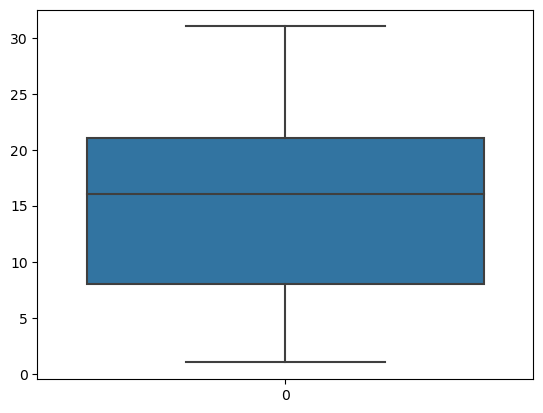

In [689]:
sns.boxplot(test['day'])

<Axes: >

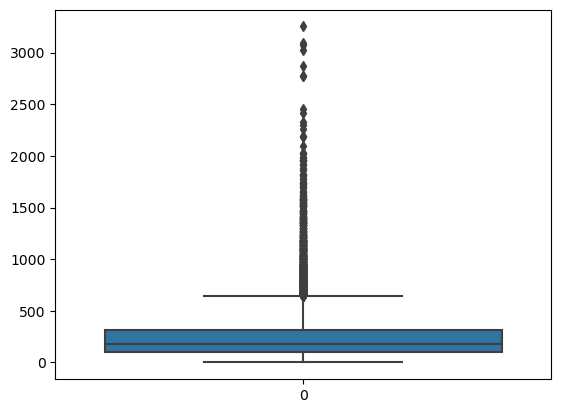

In [690]:
sns.boxplot(test['duration'])

<Axes: >

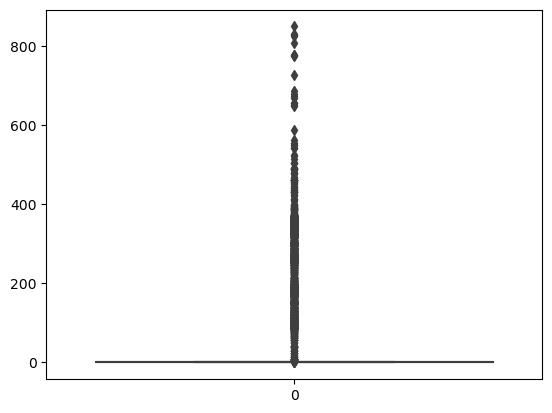

In [691]:
sns.boxplot(test['pdays'])

<Axes: >

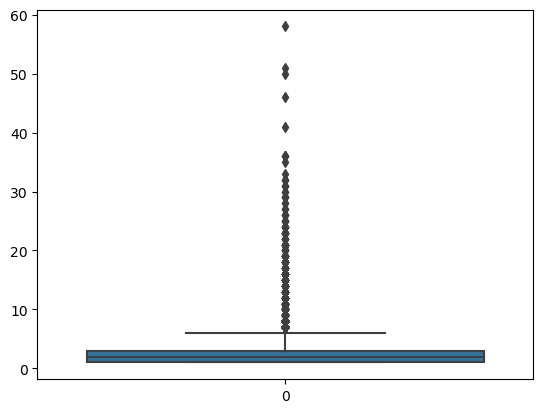

In [692]:
sns.boxplot(test['campaign'])
# #outliers are present in multiple columsn so using z score
# from scipy.stats import zscore
# out_features=test(['balance'])#'age','campaign','pdays','duration','day',
# z=np.abs(zscore(out_features))
# z

In [693]:
test.skew()

ID         -0.013625
age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

no     27932
yes     3715
Name: subscribed, dtype: int64


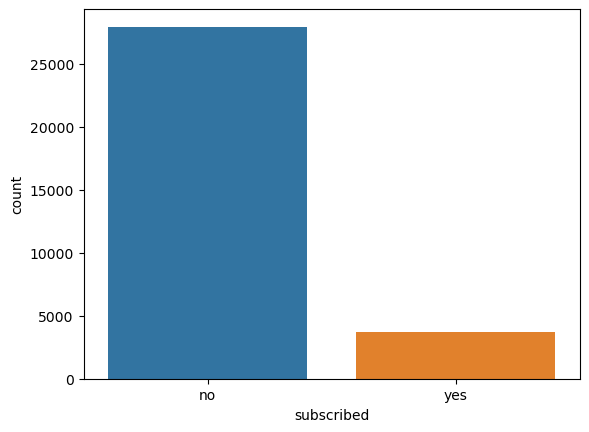

In [694]:
#checking job 


ax=sns.countplot(data=train,x='subscribed')
print(train['subscribed'].value_counts())

#encoding categorical column using odinal encoder 
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=OE.fit_transform(train[i].values.reshape(-1,1))
train

In [695]:
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [696]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


In [697]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [698]:
# we have to see corelation between target and input variable as our targer variable in category so we convert it to numerical data

train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [699]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [700]:
z=train.corr()

In [701]:
z

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


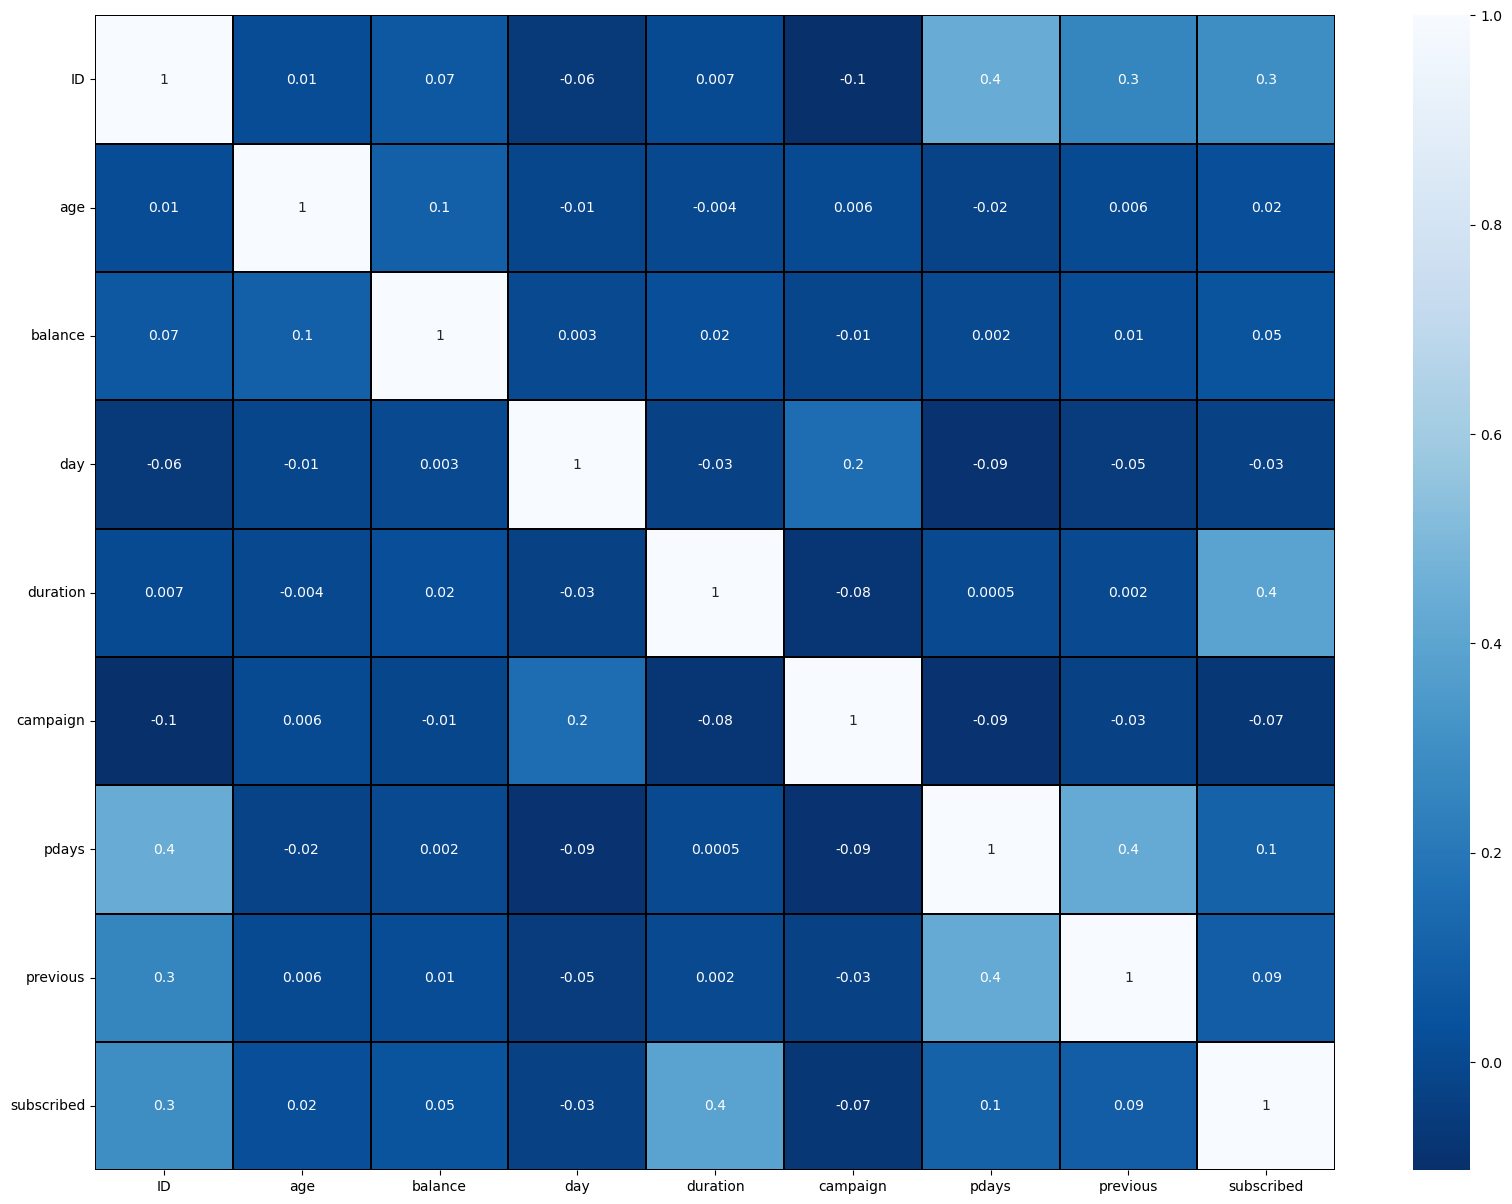

In [702]:
plt.figure(figsize=(20,15))
sns.heatmap(z,linewidths=.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

In [703]:
train.skew()

ID             0.005851
age            0.681607
balance        7.995696
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
subscribed     2.377445
dtype: float64

In [704]:
train.shape

(31647, 18)

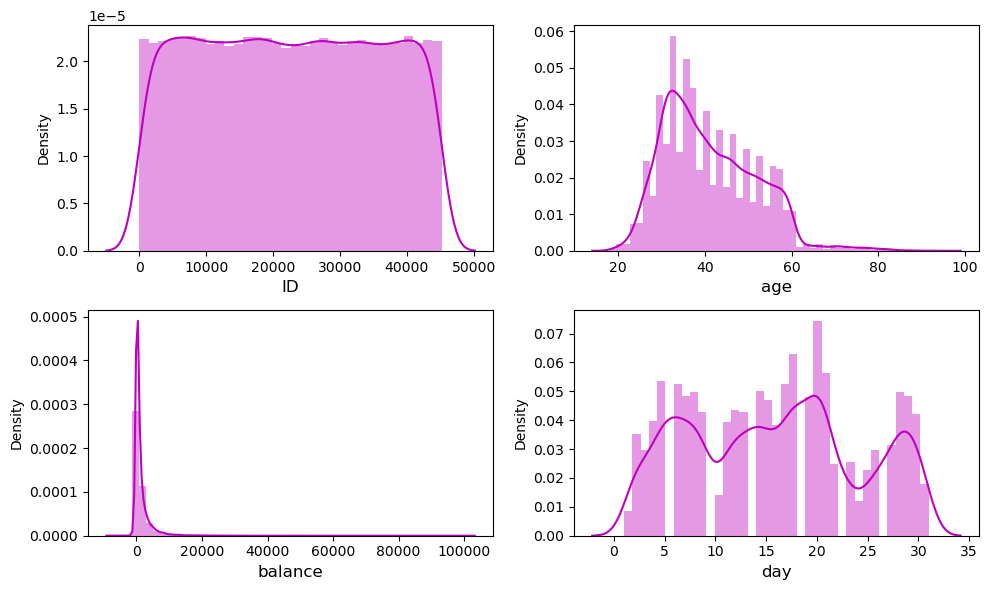

In [705]:
#now checking how data have been distributed in remaining column
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber=1
for col in z:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(train[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [706]:
train['balance']=np.cbrt(train['balance'])

In [707]:
train['balance'].skew()

-0.0860142247389578

In [708]:
train['duration']=np.cbrt(train['duration'])
train['duration'].skew()
      

0.6472745205258513

In [709]:
train['campaign']=np.cbrt(train['campaign'])
train['campaign'].skew()
      

       


1.6679384708924412

In [710]:
train['pdays']=np.cbrt(train['pdays'])
train['pdays'].skew()

          

1.7790364126058276

In [711]:
train['previous']=np.cbrt(train['previous'])
train['previous'].skew()

      

2.079738303449781

In [712]:
train.shape

(31647, 18)

In [713]:
#encoding categorical column using odinal encoder 
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=OE.fit_transform(train[i].values.reshape(-1,1))

In [716]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn .metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.simplefilter("ignore")
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [717]:
y = train['subscribed']
x = train.drop('subscribed', axis=1)

In [718]:
x.shape


(31647, 17)

In [719]:
y.shape

(31647,)

In [720]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8747761979989468
[[8194  178]
 [1011  112]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      8372
           1       0.39      0.10      0.16      1123

    accuracy                           0.87      9495
   macro avg       0.64      0.54      0.55      9495
weighted avg       0.83      0.87      0.84      9495



In [721]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9027909426013692
[[8139  233]
 [ 690  433]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8372
           1       0.65      0.39      0.48      1123

    accuracy                           0.90      9495
   macro avg       0.79      0.68      0.72      9495
weighted avg       0.89      0.90      0.89      9495



In [722]:
#now checking accuracy for ExtraTree Classifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.9070036861506056
[[8166  206]
 [ 677  446]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8372
           1       0.68      0.40      0.50      1123

    accuracy                           0.91      9495
   macro avg       0.80      0.69      0.73      9495
weighted avg       0.90      0.91      0.90      9495



In [723]:
svc=SVC()
svc.fit(x_train,y_train)
pr=svc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))


0.881727224855187
[[8372    0]
 [1123    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8372
           1       0.00      0.00      0.00      1123

    accuracy                           0.88      9495
   macro avg       0.44      0.50      0.47      9495
weighted avg       0.78      0.88      0.83      9495



In [724]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pr=dtc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))



0.8883622959452343
[[7867  505]
 [ 555  568]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8372
           1       0.53      0.51      0.52      1123

    accuracy                           0.89      9495
   macro avg       0.73      0.72      0.73      9495
weighted avg       0.89      0.89      0.89      9495



In [725]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pr=rfc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

0.9113217482885729
[[8100  272]
 [ 570  553]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8372
           1       0.67      0.49      0.57      1123

    accuracy                           0.91      9495
   macro avg       0.80      0.73      0.76      9495
weighted avg       0.90      0.91      0.91      9495



In [726]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pr=knn.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

0.8889942074776198
[[8090  282]
 [ 772  351]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8372
           1       0.55      0.31      0.40      1123

    accuracy                           0.89      9495
   macro avg       0.73      0.64      0.67      9495
weighted avg       0.87      0.89      0.88      9495



In [727]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pr=etc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

0.9068983675618747
[[8167  205]
 [ 679  444]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8372
           1       0.68      0.40      0.50      1123

    accuracy                           0.91      9495
   macro avg       0.80      0.69      0.72      9495
weighted avg       0.89      0.91      0.90      9495



In [728]:
from sklearn.model_selection import cross_val_score

In [729]:
#checking CV score for random data classifier
score=cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,pr)-score.mean())

[0.9121643  0.91232227 0.90930637 0.91467846 0.9112024 ]
0.9119347610500274
difference between accuracy score and crossvalidation score is - -0.005036393488152657


In [730]:
#checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,predLR)-score.mean())

[0.88104265 0.87614534 0.87043767 0.87470374 0.87612577]
0.875691035298035
difference between accuracy score and crossvalidation score is - -0.0009148372990882558


In [731]:
#checking CV score for ADA Boost Model
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,predABC)-score.mean())

[0.90394945 0.90458136 0.89872018 0.90646232 0.90314426]
0.9033715111137404
difference between accuracy score and crossvalidation score is - -0.0005805685123712045


In [732]:
#checking CV score for Extra tree classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,predET)-score.mean())

[0.90995261 0.90537125 0.90646232 0.90930637 0.9053563 ]
0.9072897669819984
difference between accuracy score and crossvalidation score is - -0.0002860808313928098


In [733]:
#cross validation for KNN

score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,pr)-score.mean())

[0.88088468 0.88546603 0.88449992 0.88244588 0.88260389]
0.8831800805589856
difference between accuracy score and crossvalidation score is - 0.023718287002889138


In [734]:
#cross validation for KNN

score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,pr)-score.mean())

[0.88262243 0.88262243 0.88260389 0.88260389 0.88260389]
0.882611305265738
difference between accuracy score and crossvalidation score is - 0.02428706229613664


In [735]:
#LR  have least difference so we consider it as best performing ==hypertuning
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C' : np.logspace(-4, 4, 20),'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [100, 1000,2500, 5000]}]

In [736]:
GCV=GridSearchCV (LogisticRegression(),param_grid ,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))